<a href="https://colab.research.google.com/github/ShabnaIlmi/Data-Science-Group-Project/blob/Importer_Risk_Prediction_02/Neural_Networks_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Installing the Relevant Libraries**

In [2]:
# Installing the relevant libraries - XGBoost
# !pip install xgboost

In [3]:
# Installing the relevant libraries - XAI
!pip install lime
!pip install shap

# **Importing the Necessary Libraries**

In [4]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
import shap
import lime
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
import joblib
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import shap
import lime
import lime.lime_tabular
import numpy as np
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from lime.lime_tabular import LimeTabularExplainer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import warnings
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading the Dataset**

In [6]:
# Loading the Dataset
data = pd.read_excel("/content/drive/MyDrive/risk-prediction/Dataset/expanded_chemical_import_risk_data_with_probabilities.xlsx")

In [7]:
# Displaying the Dataset Head
data.head()

,Importer_ID,Import_Frequency,Import_Quantity (kg),Chemical_Name,HS Code,Country_of_Origin,Importation_Description,Compliance_History,Past_Violations,Financial_Stability,Risk_Category,Import_Frequency_Norm,Import_Quantity_Norm,Past_Violations_Norm,Risk_Probability
0,IMP001,36,5199,"Fluorides; fluorosilicates, fluoroaluminates, ...",282619,Pakistan,Used in aluminum smelting & glass manufacturing,Excellent,4,High,Risky,0.241611,0.010513,0.8,0.455212
1,IMP002,26,3398,Sulphuric acid; oleum,280700,Brazil,Petroleum refining & chemical synthesis,Poor,1,High,Not Risky,0.174497,0.006871,0.2,0.378137
2,IMP003,47,5626,Sulphuric acid; oleum,280700,India,Petroleum refining & chemical synthesis,Average,5,Medium,Risky,0.315436,0.011376,1.0,0.672681
3,IMP004,91,7700,Cyanides and cyanide oxides: Of sodium,283711,India,Gold mining & electroplating industry,Excellent,4,Medium,Not Risky,0.610738,0.015570,0.8,0.432631
4,IMP005,63,8377,Nitric acid; sulphonitric acids,280800,China,Used in fertilizer manufacturing & explosives ...,Average,4,Low,Not Risky,0.422819,0.016939,0.8,0.573976


# **Exploratory Data Analysis**

In [8]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Importer_ID              400 non-null    object 
 1   Import_Frequency         400 non-null    int64  
 2   Import_Quantity (kg)     400 non-null    int64  
 3   Chemical_Name            400 non-null    object 
 4   HS Code                  400 non-null    int64  
 5   Country_of_Origin        400 non-null    object 
 6   Importation_Description  400 non-null    object 
 7   Compliance_History       400 non-null    object 
 8   Past_Violations          400 non-null    int64  
 9   Financial_Stability      400 non-null    object 
 10  Risk_Category            400 non-null    object 
 11  Import_Frequency_Norm    400 non-null    float64
 12  Import_Quantity_Norm     400 non-null    float64
 13  Past_Violations_Norm     400 non-null    float64
 14  Risk_Probability         4

### **Identifying Categorical and Numerical Columns**

In [9]:
# Identifying categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

## **Categorical Features**

In [10]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the categorical features
print("Categorical Features:")
for feature in categorical_features:
    print(f"- {feature}")

# Display data type of the columns
print("\nData Type of Categorical Features:")
print(data[categorical_features].dtypes)

Categorical Features:
- Importer_ID
- Chemical_Name
- Country_of_Origin
- Importation_Description
- Compliance_History
- Financial_Stability
- Risk_Category

Data Type of Categorical Features:
Importer_ID                object
Chemical_Name              object
Country_of_Origin          object
Importation_Description    object
Compliance_History         object
Financial_Stability        object
Risk_Category              object
dtype: object


In [11]:
# Displaying Dataset Information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Importer_ID              400 non-null    object 
 1   Import_Frequency         400 non-null    int64  
 2   Import_Quantity (kg)     400 non-null    int64  
 3   Chemical_Name            400 non-null    object 
 4   HS Code                  400 non-null    int64  
 5   Country_of_Origin        400 non-null    object 
 6   Importation_Description  400 non-null    object 
 7   Compliance_History       400 non-null    object 
 8   Past_Violations          400 non-null    int64  
 9   Financial_Stability      400 non-null    object 
 10  Risk_Category            400 non-null    object 
 11  Import_Frequency_Norm    400 non-null    float64
 12  Import_Quantity_Norm     400 non-null    float64
 13  Past_Violations_Norm     400 non-null    float64
 14  Risk_Probability         4

In [12]:
# List of categorical features
categorical_features = data.select_dtypes(include=['object']).columns

# Displaying the unique values and their counts relevant to each categorical column
print("Unique values and their count relevant to each categorical column:\n")
for col in categorical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count relevant to each categorical column:

Importer_ID
IMP384    1
IMP383    1
IMP382    1
IMP381    1
IMP380    1
         ..
IMP005    1
IMP004    1
IMP003    1
IMP002    1
IMP001    1
Name: count, Length: 400, dtype: int64
 
Chemical_Name
Bromine                                                                           45
Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts    40
Chlorine                                                                          39
Cyanides and cyanide oxides: Of sodium                                            35
Iodine                                                                            34
Chlorates and perchlorates; bromates and perbromates; iodates and periodates      32
Cyanides and cyanide oxides: Other                                                32
Halides and halide oxides of non-metals                                           31
Nitric acid; sulphonitric acids                      

In [13]:
# Displaying the categorical columns which contains null values and their counts
print("Categorical columns with null values and their counts:")
for col in categorical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Categorical columns with null values and their counts:


In [14]:
# Displaying the categorical columns which contain 'Unknown' values and their relevant counts
print("Categorical columns with 'Unknown' values and their counts:")
for col in categorical_features:
    unknown_count = (data[col] == 'Unknown').sum()
    if unknown_count > 0:
        print(f"{col}: {unknown_count}")

Categorical columns with 'Unknown' values and their counts:


## **Visualizing the Distribution of the Categorical columns**

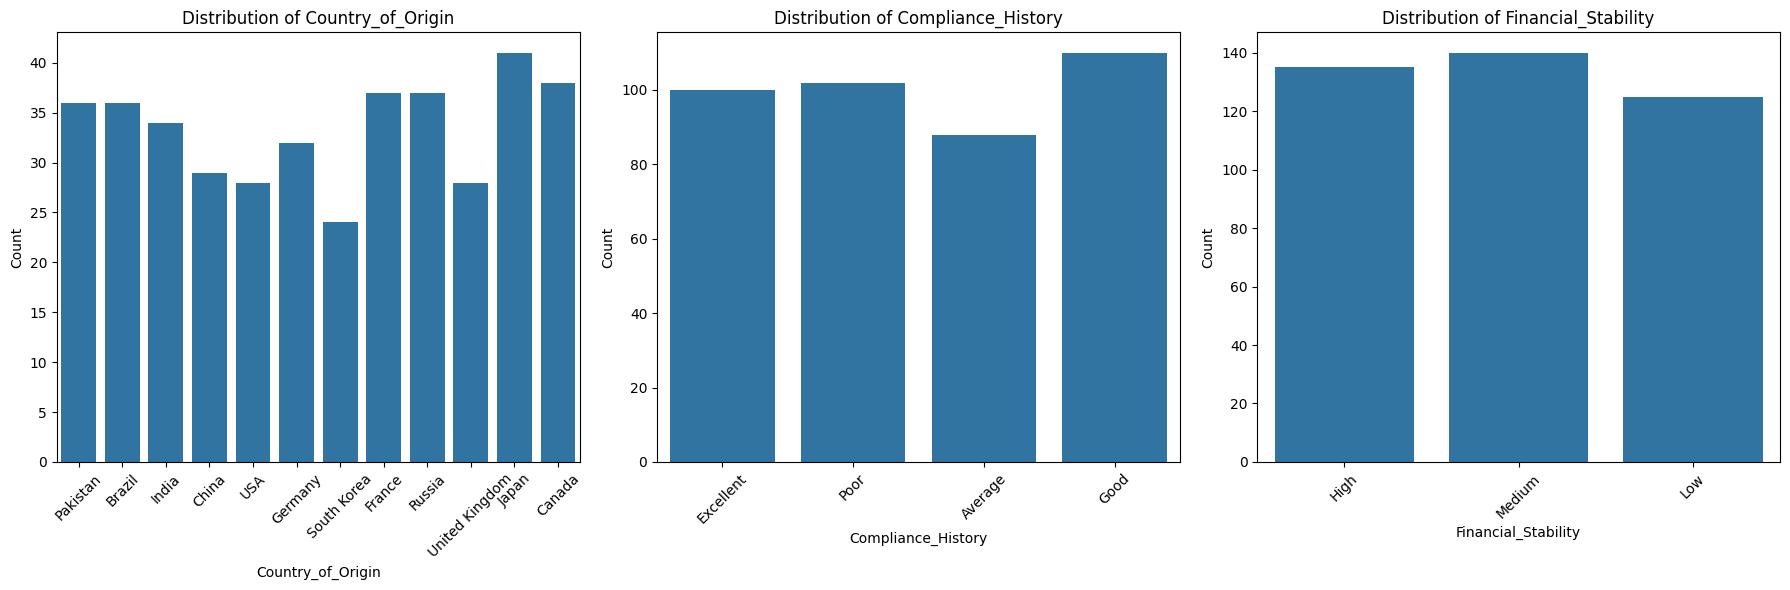

In [15]:
# List of specific categorical features to visualize
selected_features = ['Country_of_Origin', 'Compliance_History', 'Financial_Stability']

# Create a single row with three subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for i, col in enumerate(selected_features):
    sns.countplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## **Numerical Features**

In [16]:
# Numerical Features
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

# Displaying the Numerical Columns
print("Numerical Features:")
print(numerical_features)

Numerical Features:
Index(['Import_Frequency', 'Import_Quantity (kg)', 'HS Code',
       'Past_Violations', 'Import_Frequency_Norm', 'Import_Quantity_Norm',
       'Past_Violations_Norm', 'Risk_Probability'],
      dtype='object')


In [17]:
# Displaying the unique values and their count in the numerical columns
print("Unique values and their count in the numerical columns:\n")
for col in numerical_features:
    unique_values = data[col].unique()
    value_counts = data[col].value_counts()
    print(value_counts)
    print(" ")

Unique values and their count in the numerical columns:

Import_Frequency
63     10
57      8
37      8
113     7
99      7
       ..
123     1
136     1
35      1
29      1
134     1
Name: count, Length: 130, dtype: int64
 
Import_Quantity (kg)
1851      5
6877      5
7713      5
1635      4
313945    4
         ..
6959      1
18118     1
2606      1
633       1
15391     1
Name: count, Length: 285, dtype: int64
 
HS Code
282911    39
310210    39
280110    39
282611    35
283719    35
280130    35
280700    34
282619    34
280120    29
284700    29
283711    28
280800    24
Name: count, dtype: int64
 
Past_Violations
4    77
1    73
3    71
0    66
5    57
2    56
Name: count, dtype: int64
 
Import_Frequency_Norm
0.422819    10
0.382550     8
0.248322     8
0.758389     7
0.664430     7
            ..
0.825503     1
0.912752     1
0.234899     1
0.194631     1
0.899329     1
Name: count, Length: 130, dtype: int64
 
Import_Quantity_Norm
0.003743    5
0.013906    5
0.015596    5
0.0033

In [18]:
# Displaying the numerical columns with null values and their relevant counts
print("Numerical columns with null values and their relevant counts:")
for col in numerical_features:
    null_count = data[col].isnull().sum()
    if null_count > 0:
        print(f"{col}: {null_count}")

Numerical columns with null values and their relevant counts:


## **Visualization of the Correlation HeatMap**

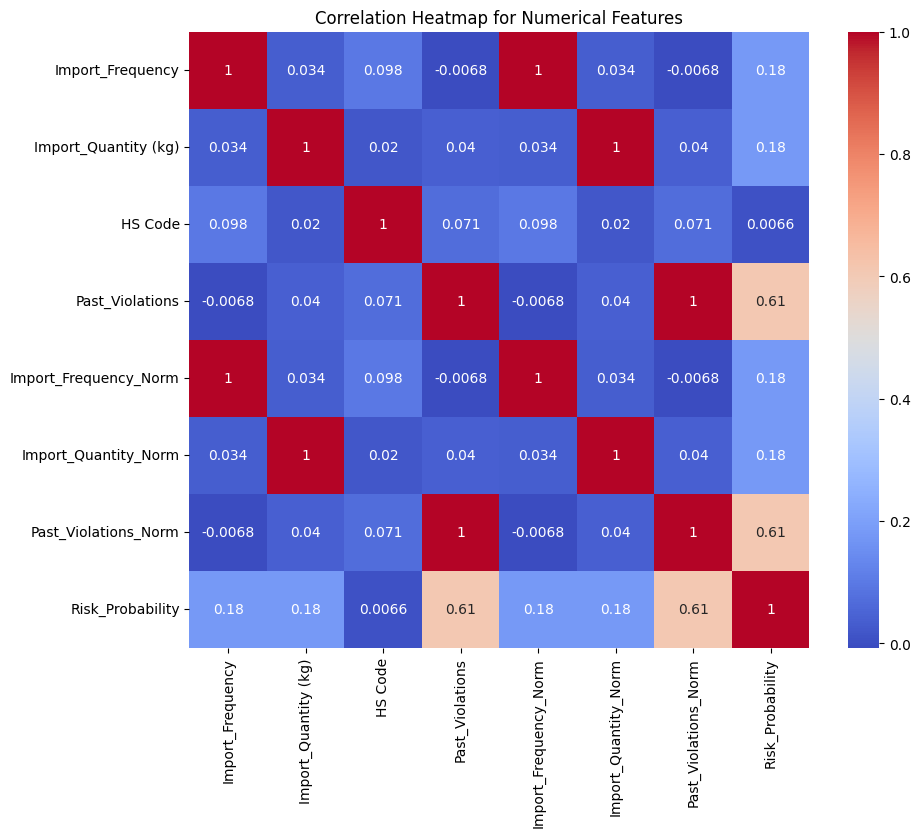

In [19]:
# Plotting the Correlation HeatMap for the Numerical Features
plt.figure(figsize=(10, 8))
sns.heatmap(data[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()

## **Handling the Outliers**

## **Visualizing the Outliers**

In [20]:
# Function to detect outliers using IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

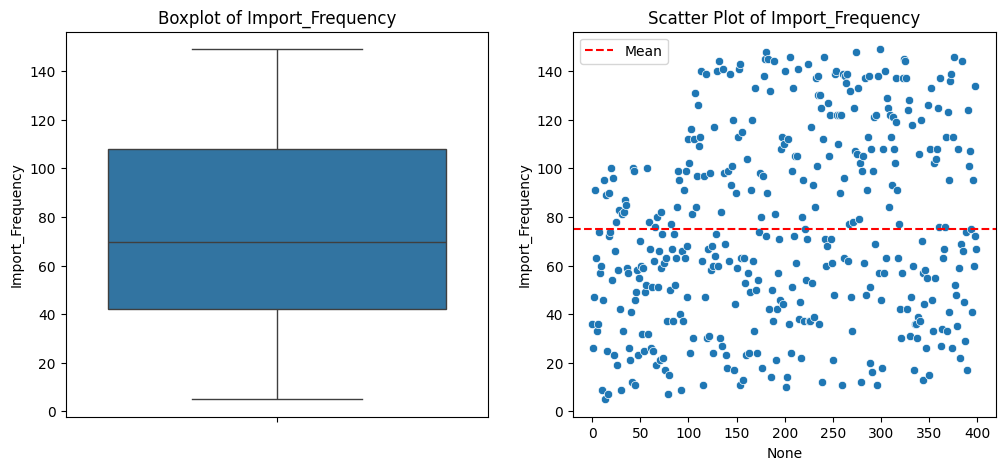

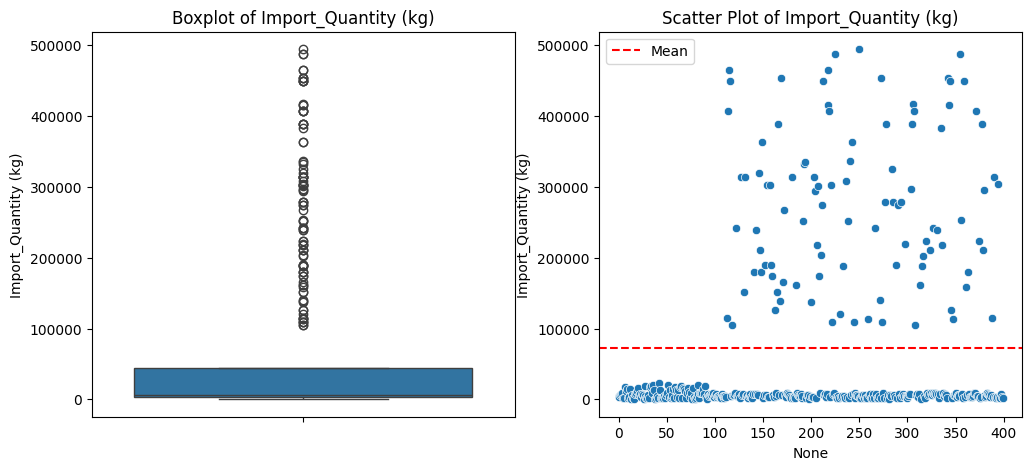

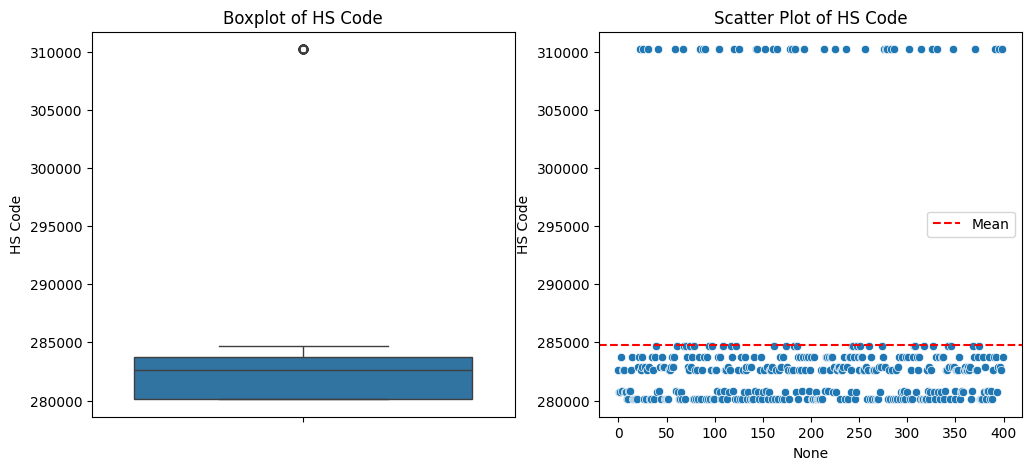

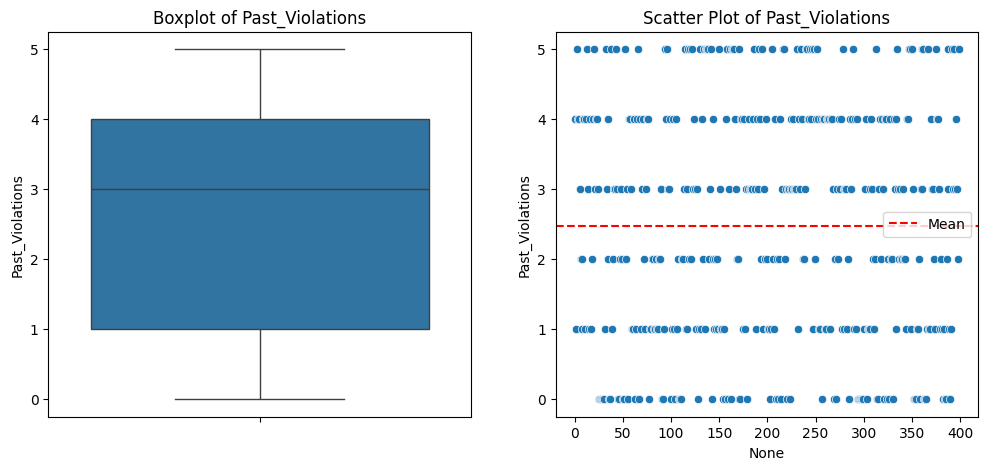

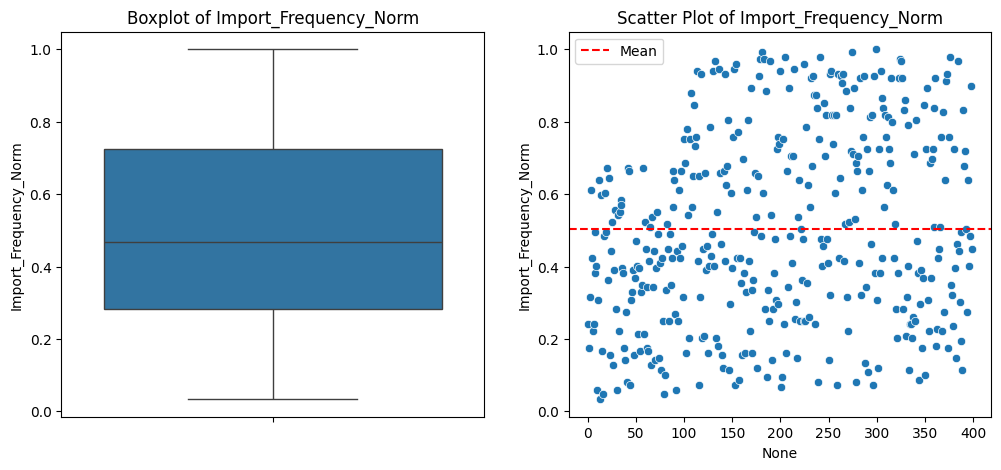

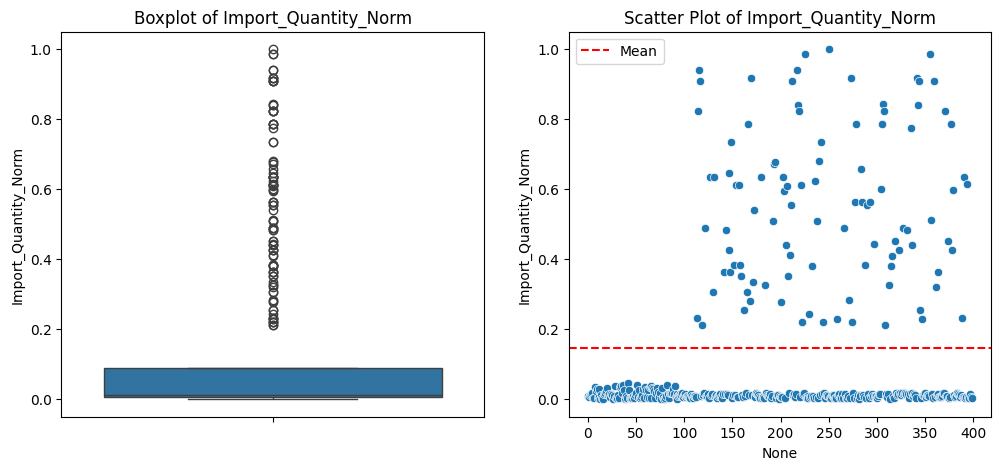

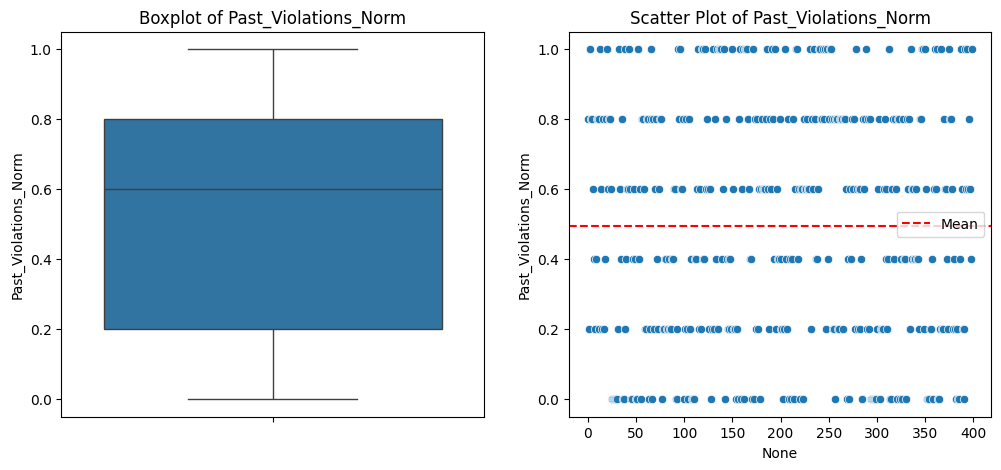

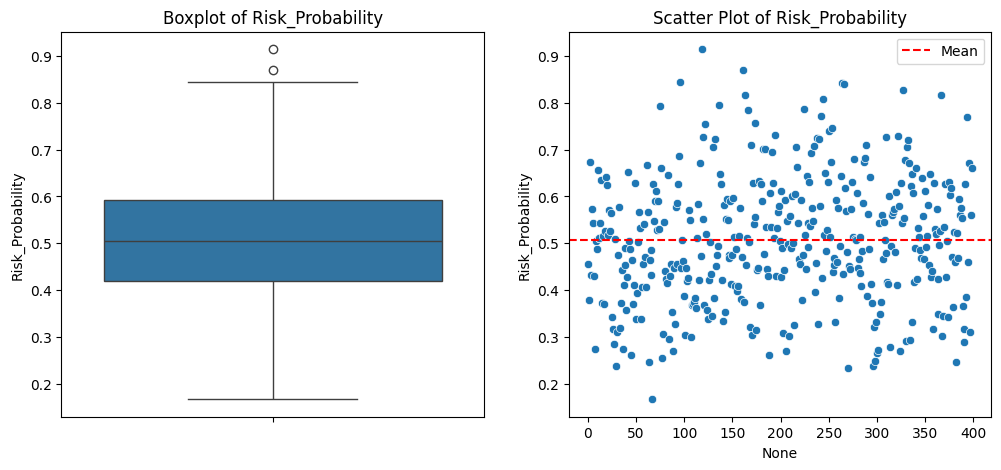

In [21]:
# Function to visualize outliers using boxplot and scatter plot
def visualize_outliers(data, column):
    plt.figure(figsize=(12, 5))

    plt.subplot(1, 2, 1)
    sns.boxplot(y=data[column])
    plt.title(f'Boxplot of {column}')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=data.index, y=data[column])
    plt.axhline(data[column].mean(), color='red', linestyle='dashed', label='Mean')
    plt.title(f'Scatter Plot of {column}')
    plt.legend()

    plt.show()

# Visualizing the outliers for numerical columns
for col in numerical_features:
    visualize_outliers(pd.DataFrame(data), col)

In [22]:
# Dictionary to store outliers for each numerical column
outlier_dict = {}

# Detect outliers for each numerical column using IQR
for col in numerical_features:
    outliers_iqr = detect_outliers_iqr(pd.DataFrame(data), col)
    outlier_dict[col] = outliers_iqr

# Display the detected outliers in a structured way
print("=" * 50)
print("          Outlier Detection using IQR")
print("=" * 50)

for col, outliers in outlier_dict.items():
    print(f"\n **{col}** - Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.to_string(index=False))
    else:
        print(" No outliers detected.")
    print("-" * 50)

          Outlier Detection using IQR

 **Import_Frequency** - Outliers detected: 0
 No outliers detected.
--------------------------------------------------

 **Import_Quantity (kg)** - Outliers detected: 100
Importer_ID  Import_Frequency  Import_Quantity (kg)                                                                  Chemical_Name  HS Code Country_of_Origin                                  Importation_Description Compliance_History  Past_Violations Financial_Stability Risk_Category  Import_Frequency_Norm  Import_Quantity_Norm  Past_Violations_Norm  Risk_Probability
     IMP114               140                114397                         Hydrogen peroxide, whether or not solidified with urea   280120    United Kingdom            Agriculture sector, soil nutrient enhancement               Good                3              Medium     Not Risky               0.939597              0.231320                   0.6          0.512092
     IMP115                62                40695

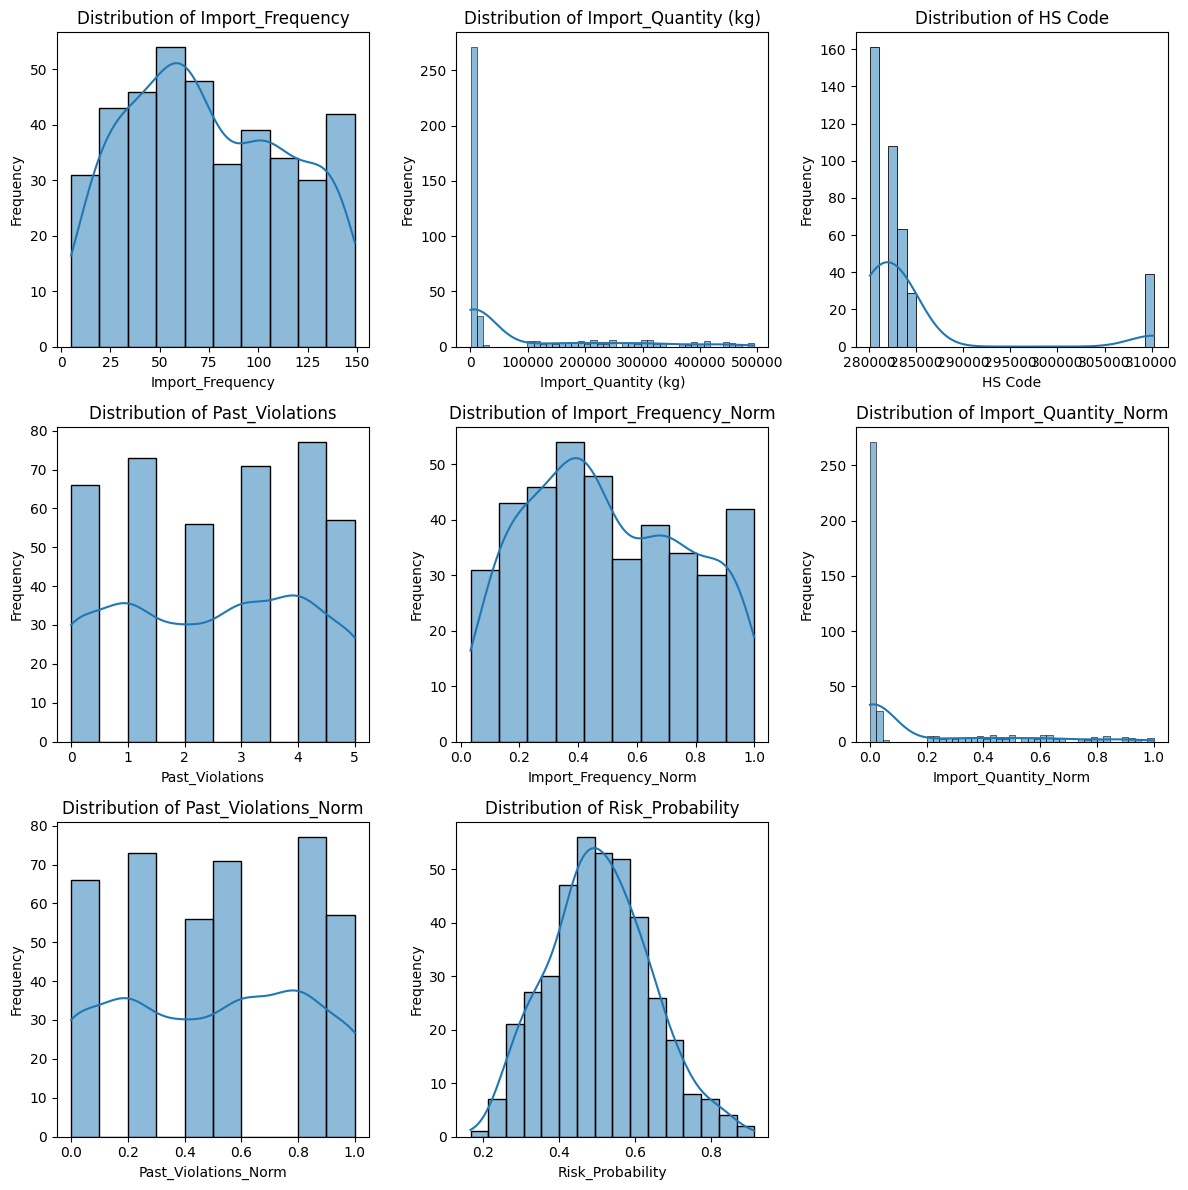

In [23]:
# Visulaizing the Distribution of the Numerical Features
num_plots = len(numerical_features)
rows = (num_plots // 3) + (num_plots % 3 > 0)
cols = min(num_plots, 3)

plt.figure(figsize=(12, 4 * rows))

for i, col in enumerate(numerical_features, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


# **Data Preprocessing**

## **Data Cleaning**

In [24]:
# Step 1: Dropping irrelevant columns i
# data = data.drop(columns=["Importer_ID"])

In [25]:
# Step 2: Removing whitespaces from the object type columns

# List of categorical columns
categorical_cols = ["Importer_ID", "Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability"]

# Remove leading and trailing whitespaces from object type columns
for col in categorical_cols:
    if data[col].dtype == 'object':
        data[col] = data[col].str.strip()

In [26]:
# Step 3: Dropping duplicate values
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [27]:
# Display dataset information
print("\nDataset information after removing duplicates:")
data.info()


Dataset information after removing duplicates:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Importer_ID              400 non-null    object 
 1   Import_Frequency         400 non-null    int64  
 2   Import_Quantity (kg)     400 non-null    int64  
 3   Chemical_Name            400 non-null    object 
 4   HS Code                  400 non-null    int64  
 5   Country_of_Origin        400 non-null    object 
 6   Importation_Description  400 non-null    object 
 7   Compliance_History       400 non-null    object 
 8   Past_Violations          400 non-null    int64  
 9   Financial_Stability      400 non-null    object 
 10  Risk_Category            400 non-null    object 
 11  Import_Frequency_Norm    400 non-null    float64
 12  Import_Quantity_Norm     400 non-null    float64
 13  Past_Violations_Norm     400 non

## **Categorical Columns**


## **Data Encoding**

In [28]:
# Step 3: Encoding the Categorical Columns
categorical_cols = ["Importer_ID", "Chemical_Name", "Country_of_Origin", "Importation_Description", "Compliance_History", "Financial_Stability"]
encoder = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')
categorical_data = encoder.fit_transform(data[categorical_cols])

# Convert to DataFrame
cat_data = pd.DataFrame(categorical_data, columns=encoder.get_feature_names_out(categorical_cols))

## **Numerical Columns**

In [29]:
# Identifying numerical columns
numerical_cols = ["Import_Frequency", "HS Code", "Past_Violations", "Import_Quantity (kg)"]

## **Handling the Outliers**

In [30]:
# Step 4: Handling the Outliers in the Numerical Columns
for col in numerical_features:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data[col] = np.where(data[col] > upper_bound, upper_bound, data[col])
    data[col] = np.where(data[col] < lower_bound, lower_bound, data[col])

In [31]:
# Dictionary to store outliers for each numerical column
outlier_dict = {}

# Detect outliers for each numerical column using IQR
for col in numerical_features:
    outliers_iqr = detect_outliers_iqr(pd.DataFrame(data), col)
    outlier_dict[col] = outliers_iqr

# Display the detected outliers in a structured way
print("=" * 50)
print("          Outlier Detection using IQR")
print("=" * 50)

for col, outliers in outlier_dict.items():
    print(f"\n **{col}** - Outliers detected: {len(outliers)}")
    if len(outliers) > 0:
        print(outliers.to_string(index=False))
    else:
        print(" No outliers detected.")
    print("-" * 50)

          Outlier Detection using IQR

 **Import_Frequency** - Outliers detected: 0
 No outliers detected.
--------------------------------------------------

 **Import_Quantity (kg)** - Outliers detected: 100
Importer_ID  Import_Frequency  Import_Quantity (kg)                                                                  Chemical_Name  HS Code Country_of_Origin                                  Importation_Description Compliance_History  Past_Violations Financial_Stability Risk_Category  Import_Frequency_Norm  Import_Quantity_Norm  Past_Violations_Norm  Risk_Probability
     IMP114             140.0            104700.375                         Hydrogen peroxide, whether or not solidified with urea 280120.0    United Kingdom            Agriculture sector, soil nutrient enhancement               Good              3.0              Medium     Not Risky               0.939597              0.211713                   0.6          0.512092
     IMP115              62.0            104700.37

## **Target Variable**

In [32]:
# Step 5: Target variables
target_classification = "Risk_Category"
target_regression = "Risk_Probability"

In [33]:
# Step 6: Scaling the numerical features
numerical_cols = ["Import_Frequency", "Past_Violations", "Import_Quantity (kg)", "HS Code"]
scaler = StandardScaler()
numerical_data = scaler.fit_transform(data[numerical_cols])
num_data = pd.DataFrame(numerical_data, columns=numerical_cols)

In [34]:
# Step 7: Encode categorical target variable
label_encoder = LabelEncoder()
y_classification = label_encoder.fit_transform(data[target_classification])

In [35]:
# Extracting numerical target variable
y_regression = data[target_regression]

In [36]:
# Step 8: Combining all processed features
X = pd.concat([num_data, cat_data], axis=1)

## **Handling the Class Imbalance**

In [37]:
# Step 9: Applying SMOTE for balancing classification target variable
smote_class = SMOTE(random_state=42)
X_resampled_class, y_resampled_class = smote_class.fit_resample(X, y_classification)

In [38]:
# No SMOTE for Regression as it deals with continuous values
X_resampled_reg = X
y_resampled_reg = y_regression

In [39]:
# Step 10: Train-test split

# Train-test split for classification
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_resampled_class, y_resampled_class, test_size=0.2, random_state=42)

In [40]:
# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_resampled_reg, y_resampled_reg, test_size=0.2, random_state=42)

# **Model Training**

## **Model Based on Neural Networks - Classification Model**




In [130]:
import tensorflow as tf
import numpy as np
import random
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.regularizers import l2

# Defining the improved neural network model
clf_nn = Sequential([
    Dense(512, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005), input_shape=(X_train_class.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='swish', kernel_initializer='he_normal', kernel_regularizer=l2(0.0005)),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# Compiling the model with AdamW optimizer
clf_nn.compile(optimizer=keras.optimizers.AdamW(learning_rate=0.001, weight_decay=0.0001),
               loss='binary_crossentropy',
               metrics=['accuracy'])

# Early stopping and learning rate reduction
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# 🔹 Handle class imbalance (Optional)
class_weights = {0: 1.0, 1: np.sum(y_train_class == 0) / np.sum(y_train_class == 1)}

# 🔹 Train the model
history = clf_nn.fit(X_train_class, y_train_class,
                     epochs=1000, batch_size=64,
                     validation_split=0.2,
                     callbacks=[early_stop, reduce_lr],
                     class_weight=class_weights,
                     verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 147ms/step - accuracy: 0.5104 - loss: 1.8628 - val_accuracy: 0.4783 - val_loss: 1.6516 - learning_rate: 0.0010
Epoch 2/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.5286 - loss: 1.7997 - val_accuracy: 0.4638 - val_loss: 1.6313 - learning_rate: 0.0010
Epoch 3/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.5651 - loss: 1.7321 - val_accuracy: 0.4783 - val_loss: 1.6142 - learning_rate: 0.0010
Epoch 4/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6044 - loss: 1.6457 - val_accuracy: 0.4493 - val_loss: 1.5996 - learning_rate: 0.0010
Epoch 5/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.5606 - loss: 1.7064 - val_accuracy: 0.4203 - val_loss: 1.5868 - learning_rate: 0.0010
Epoch 6/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.5880 - loss: 1.5953 - val_accuracy: 0.4203 - val_loss: 1.5752 - learning_rate: 0.0010
Epoch 7/1000
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.5889 - loss: 1.6515 - val_ac

In [132]:
# Accuracy for the Neural Networks - Classification Model
accuracy = clf_nn.evaluate(X_test_class, y_test_class)[1]
print(f"Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5196 - loss: 1.4792
Accuracy: 0.4767


In [133]:
# Classification Report for the Neural Networks Classifier
y_pred_class_nn = (clf_nn.predict(X_test_class) > 0.5).astype(int)
print(classification_report(y_test_class, y_pred_class_nn))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
              precision    recall  f1-score   support

           0       0.44      0.76      0.55        37
           1       0.59      0.27      0.37        49

    accuracy                           0.48        86
   macro avg       0.51      0.51      0.46        86
weighted avg       0.52      0.48      0.45        86



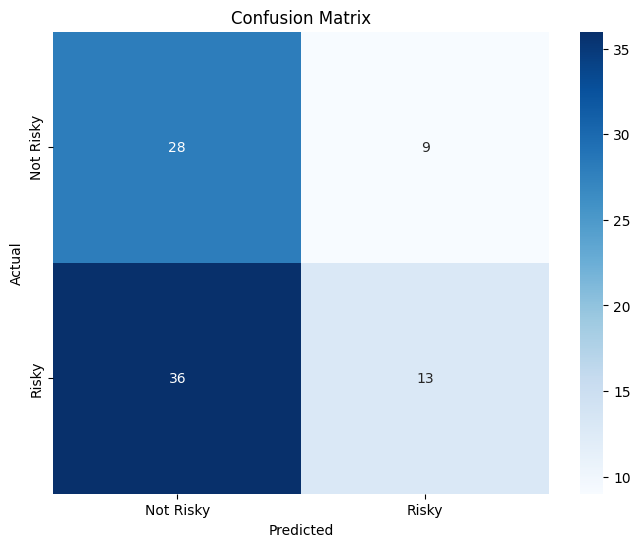

In [134]:
# Plotting the Confusion Matrix for the Classification Model
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class_nn), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## **Model Based on Neural Networks - Regressor Model**

In [113]:
# Defining the neural network model
reg_nn = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_reg.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compiling the model
reg_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.05),
               loss='mean_squared_error',
               metrics=['mae'])

# Training the model
reg_nn.fit(X_train_reg, y_train_reg,
           epochs=1000, batch_size=32,
           validation_split=0.1, callbacks=[early_stop], verbose=1)


Epoch 1/1000


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - loss: 20.1802 - mae: 2.3115 - val_loss: 0.3804 - val_mae: 0.6016
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3855 - mae: 0.6046 - val_loss: 0.3548 - val_mae: 0.5801
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.3346 - mae: 0.5605 - val_loss: 0.2242 - val_mae: 0.4526
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.1838 - mae: 0.3907 - val_loss: 0.1011 - val_mae: 0.2854
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0887 - mae: 0.2570 - val_loss: 0.0408 - val_mae: 0.1719
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0456 - mae: 0.1739 - val_loss: 0.0174 - val_mae: 0.1077
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0278 - mae: 0.1372 - val_loss: 0.0178 - val_mae: 0.1126
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.0132 - mae: 0.0918 - val_loss: 0.0127 - val_mae: 0.0956
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0100 - mae: 0.0

In [114]:
# Accuracy for the Neural Networks Regressor Model
accuracy = reg_nn.evaluate(X_test_reg, y_test_reg)[1]
print(f"Accuracy: {accuracy:.4f}")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0132 - mae: 0.0896 
Accuracy: 0.0903


In [120]:
# Classification Report for the Regressor Model
print(f"Regression Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg_nn):.4f}")

Regression Mean Squared Error: 0.0129


# **Saving the Model**

In [136]:
# Saving the Models
import joblib
import tensorflow as tf

# Saving the trained neural network models
clf_nn.save("neural_network_classifier.h5")
reg_nn.save("neural_network_regressor.h5")

# Saving preprocessing objects
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [148]:
import numpy as np
import pandas as pd
import joblib
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the necessary preprocessor objects
encoder = joblib.load("encoder.pkl")   # Categorical encoder
scaler = joblib.load("scaler.pkl")     # Numerical scaler
label_encoder = joblib.load("label_encoder.pkl")  # Label encoder for the target class

# Load the trained neural network models
nn_classifier = tf.keras.models.load_model("neural_network_classifier.h5")  # Classification model
nn_regressor = tf.keras.models.load_model("neural_network_regressor.h5")    # Regression model for predicting probability

# Define the columns for categorical and numerical features
categorical_cols = ['Importer_ID','Chemical_Name', 'Country_of_Origin', 'Importation_Description', 'Compliance_History', 'Financial_Stability']
numerical_cols = ["Import_Frequency", "Past_Violations", "Import_Quantity (kg)", "HS Code"]

def predict_risk(input_data):
    """
    input_data: dict containing feature values.
    Returns: Predicted Risk Category and Risk Probability
    """
    # Convert input into DataFrame
    input_data = pd.DataFrame([input_data])

    # Process categorical features
    cat_features = encoder.transform(input_data[categorical_cols])
    cat_data = pd.DataFrame(cat_features, columns=encoder.get_feature_names_out(categorical_cols))

    # Process numerical features
    num_features = scaler.transform(input_data[numerical_cols])
    num_data = pd.DataFrame(num_features, columns=numerical_cols)

    # Combine processed features
    processed_input = pd.concat([num_data, cat_data], axis=1)

    # Make predictions using the trained neural network classifier for category
    predicted_class = nn_classifier.predict(processed_input)  # Predict the class (binary output)
    predicted_class = (predicted_class > 0.5).astype(int)  # Binary classification

    # Inverse transform for the class label
    predicted_category = label_encoder.inverse_transform(predicted_class)[0]

    # Use the regressor to predict the probability (continuous value)
    predicted_prob = nn_regressor.predict(processed_input)  # Probability from the NN regressor
    predicted_prob = predicted_prob[0][0]  # Get the predicted probability (scalar value)

    return predicted_category, predicted_prob  # Return category and the probability

# Example usage
example_input = {
    "Importer_ID": "IMP004",
    "Import_Frequency": 91,
    "HS Code": 283711,
    "Past_Violations": 4,
    "Import_Quantity (kg)": 5626,
    "Chemical_Name": "Cyanides and cyanide oxides: Of sodium",
    "Country_of_Origin": "India",
    "Importation_Description": "Gold mining & electroplating industry",
    "Compliance_History": "Excellent",
    "Financial_Stability": "Medium"
}

predicted_category, predicted_prob = predict_risk(example_input)
print(f"Predicted Risk Category: {predicted_category}")
print(f"Predicted Risk Probability: {predicted_prob:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 334ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Predicted Risk Category: Not Risky
Predicted Risk Probability: 0.4468


## **Explainable AI - XAI**

In [149]:
import shap
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning
import tensorflow as tf

# Suppressing warnings related to sklearn
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')

# Assuming nn_model is your trained neural network model, and X_train_class is the training data
# You will need to make sure the input data matches the structure your model expects (processed and encoded)

# Define a function to predict using the neural network (already handled in your earlier code)
def predict_nn(input_data):
    return nn_model.predict(input_data)

# Initialize SHAP Explainer using KernelExplainer
explainer = shap.KernelExplainer(predict_nn, X_train_class)

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_class)

# Adjusting the figure margins to give space for labels and decorations
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Generate the SHAP summary plot for feature importance
shap.summary_plot(shap_values, X_test_class)

# Adjusting layout padding if needed
plt.tight_layout(pad=2.0)

# Save the plot with tight layout
plt.savefig("shap_summary_plot.png", bbox_inches='tight')

# Show the plot
plt.show()

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


  0%|          | 0/86 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
29819/29819 ━━━━━━━━━━━━━━━━━━━━ 104s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
29840/29840 ━━━━━━━━━━━━━━━━━━━━ 113s 4ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step
29819/29819 ━━━━━━━━━━━━━━━━━━━━ 108s 4ms/step


KeyboardInterrupt: 

In [150]:
import lime
import lime.lime_tabular
import warnings
from sklearn.exceptions import ConvergenceWarning
import numpy as np

# Suppressing warnings related to sklearn
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')

# Assuming nn_model is your trained neural network model and X_train_class is your training data

# Initialize LIME explainer for tabular data
explainer_lime = lime.lime_tabular.LimeTabularExplainer(
    X_train_class.values,  # Data for training
    feature_names=X_train_class.columns.tolist(),  # Feature names
    class_names=label_encoder.classes_,  # Class names for the labels
    mode="classification"  # Since it's a classification problem
)

# Select a sample instance from the test data for explanation
instance = X_test_class.iloc[0].values.reshape(1, -1)  # The instance should be 2D for LIME

# Define the prediction function for the neural network
def predict_nn_proba(input_data):
    return nn_model.predict(input_data)

# Generate explanation for the selected instance
exp = explainer_lime.explain_instance(instance[0], predict_nn_proba, num_features=5)

# Show the explanation in a notebook
exp.show_in_notebook()

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


IndexError: index 1 is out of bounds for axis 1 with size 1

## **Model based on Gradient Boost Classifier**

In [45]:
# Initialize and training Gradient Boosting Classifier
clf = GradientBoostingClassifier(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    warm_start=True,
    max_leaf_nodes=31,
    verbose=1
)

# Training the model on the training data
clf.fit(X_train_class, y_train_class)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.3742          -0.0004            7.28s
         2           1.3779           0.0329            5.63s
         3           1.3643          -0.0118            7.07s
         4           1.3614           0.0131            6.00s
         5           1.3600           0.0128            5.34s
         6           1.3542           0.0036            6.71s
         7           1.3447          -0.0154            6.23s
         8           1.3406           0.0002            5.76s
         9           1.3471           0.0578            6.07s
        10           1.3296          -0.0588            5.71s


GradientBoostingClassifier(learning_rate=0.05, max_depth=4, max_features='sqrt',
                           max_leaf_nodes=31, n_estimators=1000,
                           n_iter_no_change=10, random_state=42, subsample=0.8,
                           verbose=1, warm_start=True)

## **Model Based on Gradient Boost Regressor**

In [46]:
# Initializing and training Gradient Boosting Regressor
reg = GradientBoostingRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    min_samples_split=2,
    min_samples_leaf=1,
    max_features='sqrt',
    random_state=42,
    validation_fraction=0.1,
    n_iter_no_change=10,
    warm_start=True,
    max_leaf_nodes=31,
    verbose=1
)

# Training the regressor on the training data
reg.fit(X_train_reg, y_train_reg.ravel())

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.0176           0.0002            2.36s
         2           0.0177           0.0011            2.23s
         3           0.0179           0.0036            2.01s
         4           0.0164          -0.0055            3.71s
         5           0.0152          -0.0043            3.32s
         6           0.0166           0.0063            3.04s
         7           0.0155          -0.0023            2.81s
         8           0.0150          -0.0008            2.65s
         9           0.0146          -0.0003            2.53s
        10           0.0145           0.0002            2.41s
        20           0.0127          -0.0002            1.90s
        30           0.0115           0.0002            1.74s
        40           0.0102           0.0015            1.75s
        50           0.0085           0.0004            1.68s
        60           0.0067           0.0001            1.64s


<ipython-input-46-600e293c7c4d>:19: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  reg.fit(X_train_reg, y_train_reg.ravel())


        70           0.0060           0.0006            2.19s
        80           0.0058           0.0020            2.37s
        90           0.0051          -0.0006            2.59s
       100           0.0045           0.0002            2.53s
       200           0.0020          -0.0003            2.13s


GradientBoostingRegressor(learning_rate=0.05, max_depth=4, max_features='sqrt',
                          max_leaf_nodes=31, n_estimators=1000,
                          n_iter_no_change=10, random_state=42, subsample=0.8,
                          verbose=1, warm_start=True)

In [47]:
# Predictions
y_pred_class = clf.predict(X_test_class)
y_pred_reg = reg.predict(X_test_reg)

## **Saving the Models**

In [48]:
# Saving models
joblib.dump(clf, "gradient_boost_classifier.pkl")
joblib.dump(reg, "gradient_boost_regressor.pkl")
joblib.dump(encoder, "encoder.pkl")
joblib.dump(scaler, "scaler.pkl")
joblib.dump(label_encoder, "label_encoder.pkl")

['label_encoder.pkl']

In [49]:
# Predictions
y_pred_class = clf.predict(X_test_class)
y_pred_reg = reg.predict(X_test_reg)

In [50]:
# Evaluation - Classification Accuracy (Gradient Boost Classifier)
print(f"Classification Accuracy: {accuracy_score(y_test_class, y_pred_class):.4f}")

Classification Accuracy: 0.4302


In [51]:
# Evaluation - Classification Report (Gradient Boost Classifier)
print("Classification Report:")
print(classification_report(y_test_class, y_pred_class, target_names=label_encoder.classes_))

Classification Report:
              precision    recall  f1-score   support

   Not Risky       0.42      0.84      0.56        37
       Risky       0.50      0.12      0.20        49

    accuracy                           0.43        86
   macro avg       0.46      0.48      0.38        86
weighted avg       0.47      0.43      0.35        86



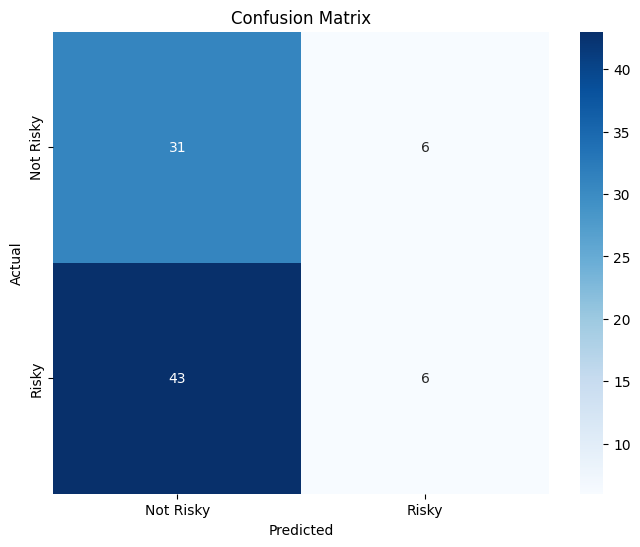

In [52]:
# Plotting the Confusion Matrix (Gradient Boost Classifier)
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test_class, y_pred_class), annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
# Evaluation - Gradient Boost Regressor
print(f"Regression Mean Squared Error: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")

Regression Mean Squared Error: 0.0056


## **Explainable AI - XAI**

/usr/local/lib/python3.11/dist-packages/shap/plots/_beeswarm.py:950: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  pl.tight_layout()


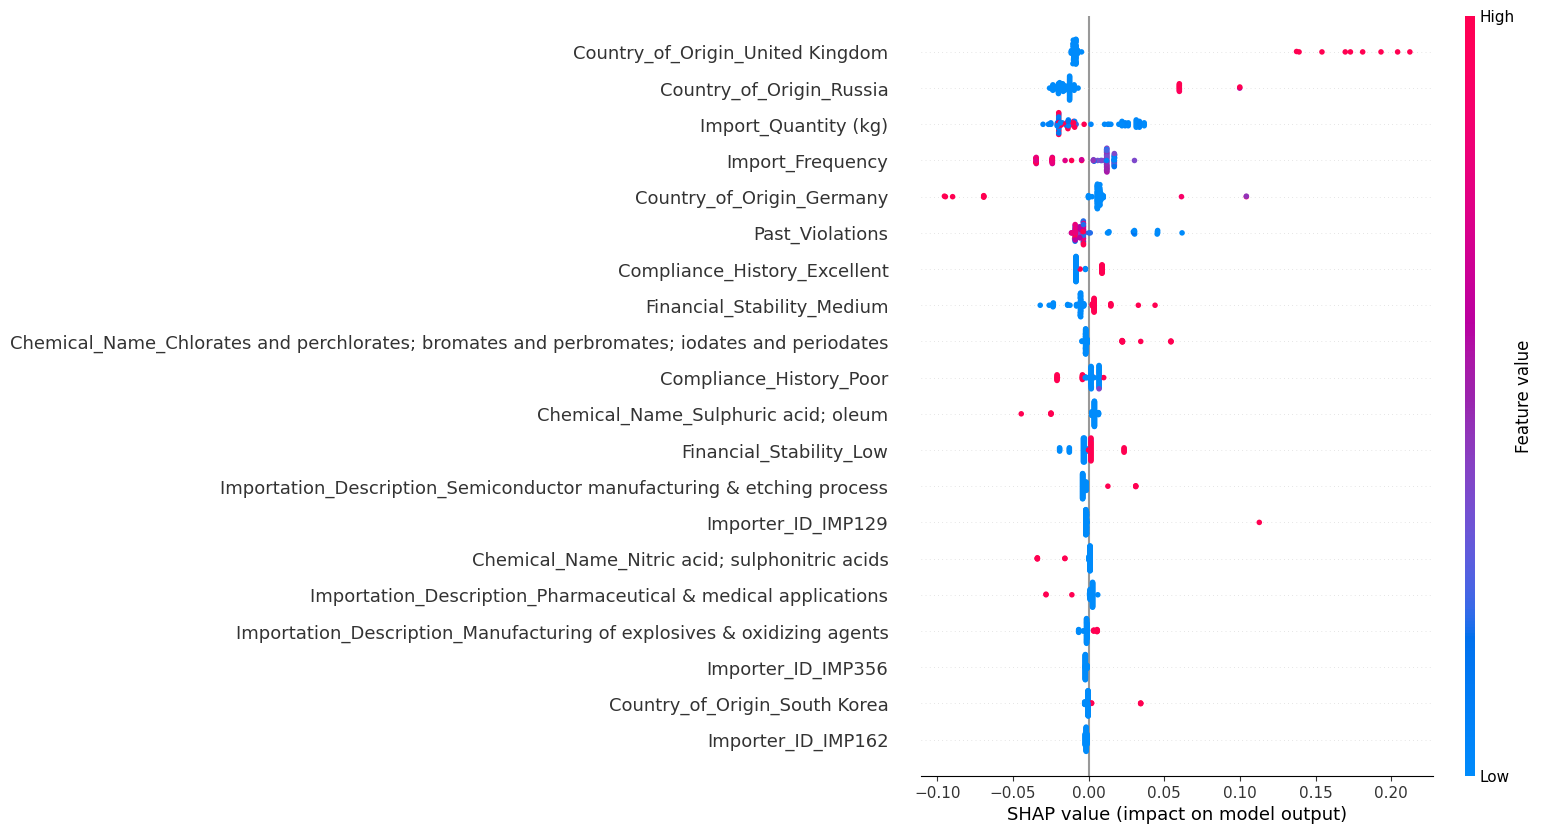

<Figure size 640x480 with 0 Axes>

In [54]:
# SHAP Feature Importance
import shap
import matplotlib.pyplot as plt
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppressing warnings related to sklearn
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')

# Initializing SHAP Explainer with your trained model and training data
explainer = shap.Explainer(clf, X_train_class)

# Computing SHAP values for the test data
shap_values = explainer(X_test_class)

# Adjusting the figure margins to give space for labels and decorations
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Generating the summary plot for feature importance
shap.summary_plot(shap_values, X_test_class)

# Adjusting layout padding if needed
plt.tight_layout(pad=2.0)

# Saving the plot with tight layout
plt.savefig("shap_summary_plot.png", bbox_inches='tight')

# Showing the plot
plt.show()

In [ ]:
# LIME Feature Importance
import warnings
from sklearn.exceptions import ConvergenceWarning

# Suppress warnings
warnings.filterwarnings("ignore", category=UserWarning, module='sklearn')
warnings.filterwarnings("ignore", category=ConvergenceWarning, module='sklearn')

# Initialize LIME explainer
explainer_lime = lime.lime_tabular.LimeTabularExplainer(X_train_class.values, feature_names=X.columns.tolist(),
                                                         class_names=label_encoder.classes_, mode="classification")
instance = X_test_class.iloc[0].values
exp = explainer_lime.explain_instance(instance, clf.predict_proba, num_features=5)
exp.show_in_notebook()

## **Predictions**

In [56]:
# Function to make predictions
def predict_risk(input_data):
    """
    input_data: dict containing feature values.
    Returns: Predicted Risk Category and Risk Probability
    """
    # Load models and preprocessors
    clf = joblib.load("gradient_boost_classifier.pkl")
    reg = joblib.load("gradient_boost_regressor.pkl")
    encoder = joblib.load("encoder.pkl")
    scaler = joblib.load("scaler.pkl")
    label_encoder = joblib.load("label_encoder.pkl")

    # Convert input into DataFrame
    input_df = pd.DataFrame([input_data])

    # Process categorical features
    cat_features = encoder.transform(input_df[categorical_cols])
    cat_df = pd.DataFrame(cat_features, columns=encoder.get_feature_names_out(categorical_cols))

    # Process numerical features
    num_features = scaler.transform(input_df[numerical_cols])
    num_df = pd.DataFrame(num_features, columns=numerical_cols)

    # Combine processed features
    processed_input = pd.concat([num_df, cat_df], axis=1)

    # Make predictions
    predicted_class = clf.predict(processed_input)
    predicted_category = label_encoder.inverse_transform(predicted_class)[0]
    predicted_prob = reg.predict(processed_input)[0]

    return predicted_category, predicted_prob

# Example usage
example_input = {
    "Importer_ID": "IMP001",
    "Import_Frequency": 36,
    "HS Code": 282619,
    "Past_Violations": 4,
    "Import_Quantity (kg)": 5199,
    "Chemical_Name": "Fluorides; fluorosilicates, fluoroaluminates, and other complex fluorine salts",
    "Country_of_Origin": "Pakistan",
    "Importation_Description": "Used in aluminum smelting & glass manufacturing",
    "Compliance_History": "Excellent",
    "Financial_Stability": "High"
}

predicted_category, predicted_prob = predict_risk(example_input)
print(f"Predicted Risk Category: {predicted_category}")
print(f"Predicted Risk Probability: {predicted_prob:.4f}")

Predicted Risk Category: Not Risky
Predicted Risk Probability: 0.4683
